In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
G=1

In [3]:
class pointParticle:
    """
        Class to implement a point particle in 2D in a gravitationally interacting system. 
        Attributes are
        Mass, Position and Velocity. Also derived are Linear Momentum and Kinetic Energy.
        Given another body, we can calculate the force, acceleration and Potential Energy. 
    """
    def __init__(self, mass, position, velocity):
        self._mass = mass
        self._position = np.array(position)
        self._velocity = np.array(velocity)
        
    @property
    def mass(self):
        return self._mass
    
    @property
    def position(self):
        return self._position
    
    @property
    def velocity(self):
        return self._velocity
        
    @property
    def momentum(self):
        return self._mass*self._velocity
    
    def distance(self, mass2):
        return np.linalg.norm([self._position, mass2.position])
    
    def rel_position(self, mass2):
        return mass2.position-self._position
    
    def rel_velocity(self, mass2):
        return mass2.velocity-self._velocity
    
    def grav_force(self, mass2):
        return G*self.mass*mass2.mass/(self.distance(mass2))**3*self.rel_position(mass2)
    
    def acceleration(self, mass2):
        return self.grav_force(mass2)/self.mass
    
    def update_pos(self, position):
        self._position = np.array(position)
        
    def update_vel(self, velocity):
        self._velocity = np.array(velocity)
        
    def potential_energy(self, mass2):
        return -G*self._mass*mass2.mass/self.distance(mass2)
    
    def kinetic_energy(self):
        return 1/2*self._mass*np.linalg.norm(self._velocity)**2
    
#     Old relic, useful if you use scipy's standard ODE solvers
    @property
    def fourpos(self):
        return np.r_[self.position, self.velocity]
    
    def fourvel(self, mass2):
        return np.r_[self.velocity, self.acceleration(mass2)]

In [12]:
# Define the time-resolution of the integration.
dt = 0.001

# Time range of the integration
time_range = np.arange(0,100,dt)

In [13]:
star = pointParticle(1,[0,0,0], [0,0,0])
planet = pointParticle(0.0001, [1,0,0], [0,0.5,0])

In [51]:
x =np.append(planet.fourpos, star.fourpos)

In [39]:
def acceleration(t, x):
    planet_x = x[:6]
    star_x = x[6:]
    planet_v = 

In [45]:
solve_ivp(acceleration, (0,10), x)

TypeError: float() argument must be a string or a number, not 'method'

In [15]:
for i in range(time_range.size):   
    x.append(x[-1] + )
    planet.update_pos(x_planet[-1])
    star.update_pos(x_star[-1])
    
    a_planet_new = planet.acceleration(star)
    a_star_new = -a_planet_new
    
    v_planet.append(v_planet[-1] + 0.5*(a_planet+a_planet_new)*dt)
    v_star.append(v_star[-1] + 0.5*(a_star+a_star_new)*dt)
    
    planet.update_vel(v_planet[-1])
    star.update_vel(v_star[-1])
    
    linear_momentum.append(planet.momentum+star.momentum)
    
pos_planet = np.array(x_planet)
vel_planet = np.array(v_planet)

pos_star = np.array(x_star)
vel_star = np.array(v_star)

linear_momentum = np.linalg.norm(np.array(linear_momentum), axis=1)

In [16]:
angular_momentum = planet.mass*np.cross(pos_planet, vel_planet)

In [17]:
rel_pos = pos_planet-pos_star

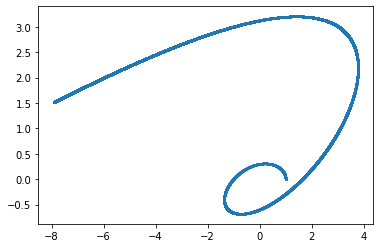

In [18]:
plt.scatter(rel_pos[:,0], rel_pos[:,1], s=1)

In [ ]:
testmass = pointParticle(1, [0.5,0,0], [0,1,0])